# Text Preprocessing

In any machine learning task or data science project life cycle, data preprocessing and cleaning is a crucial step. Textual data is highly unstructured and preprocessing such data is even mmore important. 
Natural Language Processing techniques helps us in extracting meaningful information from from raw data and analyzing and modelling huge natural language data.
Text Preprocessing is a technique used under NLP for cleaning and preparing the data for modelling and analysis.Some important text preprocessing steps are as follows.
*   Tokenization
*   Stopwords Removal
*   Stemming
*   Lemmatization
*   Part of Speech Tagging








For this example we will use a sample tweets dataset. 

In [2]:
#Importing required libraries
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string

In [18]:
#Loding data from csv
df = pd.read_csv("/content/drive/MyDrive/Data Science and Big Data Analytics Lab/tweets-dataset.csv")

In [19]:
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡,119236,NaN
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,"@105835 Your business means a lot to us. Please DM your name, zip code and additional details about your concern. ^RR https://t.co/znUu1VJn9r",NaN,119239.0
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm sure you won't! Because you don't have to!,119238,NaN
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,"@105836 LiveChat is online at the moment - https://t.co/SY94VtU8Kq or contact 03331 031 031 option 1, 4, 3 (Leave a message) to request a call back",119241,119242.0
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've tried leaving a voicemail several times in the past week https://t.co/NxVZjlYx1k,119243,119240.0


In [20]:
df.shape

(93, 7)

In [21]:
tweet_text = df.drop(['tweet_id','author_id','inbound','created_at','response_tweet_id','in_response_to_tweet_id'],axis=1)

In [22]:
pd.set_option('display.max_colwidth', None)

In [25]:
tweet_text

,text
0,@AppleSupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡
1,"@105835 Your business means a lot to us. Please DM your name, zip code and additional details about your concern. ^RR https://t.co/znUu1VJn9r"
2,@76328 I really hope you all change but I'm sure you won't! Because you don't have to!
3,"@105836 LiveChat is online at the moment - https://t.co/SY94VtU8Kq or contact 03331 031 031 option 1, 4, 3 (Leave a message) to request a call back"
4,@VirginTrains see attached error message. I've tried leaving a voicemail several times in the past week https://t.co/NxVZjlYx1k
...,...
88,@105860 I wish Amazon had an option of where I can just get it shipped to the ups store so I can avoid a lot of the struggle
89,They reschedule my shit for tomorrow https://t.co/RsvZcT982t
90,"@105861 Hey Sara, sorry to hear of the issues you are having, can I ask if it's the lay out or just the speed of the website responding? TY - Chris"
91,@Tesco bit of both - finding the layout cumbersome and when removing an item from faves - getting a huge slowdown. Not keen on the thin green line https://t.co/9281OKEebk


Lowercasing: In lowercasing the input text is converted into same casing format. This may not be helpful when we do tasks like Part of Speech tagging (where proper casing gives some information about Nouns and so on) and Sentiment Analysis (where upper casing refers to strong emotions and so on)

In [29]:
tweet_text_lower = tweet_text.apply(lambda x: x.astype(str).str.lower())
tweet_text_lower

,text
0,@applesupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡
1,"@105835 your business means a lot to us. please dm your name, zip code and additional details about your concern. ^rr https://t.co/znuu1vjn9r"
2,@76328 i really hope you all change but i'm sure you won't! because you don't have to!
3,"@105836 livechat is online at the moment - https://t.co/sy94vtu8kq or contact 03331 031 031 option 1, 4, 3 (leave a message) to request a call back"
4,@virgintrains see attached error message. i've tried leaving a voicemail several times in the past week https://t.co/nxvzjlyx1k
...,...
88,@105860 i wish amazon had an option of where i can just get it shipped to the ups store so i can avoid a lot of the struggle
89,they reschedule my shit for tomorrow https://t.co/rsvzct982t
90,"@105861 hey sara, sorry to hear of the issues you are having, can i ask if it's the lay out or just the speed of the website responding? ty - chris"
91,@tesco bit of both - finding the layout cumbersome and when removing an item from faves - getting a huge slowdown. not keen on the thin green line https://t.co/9281okeebk


**Removal of Punctuations**
In this step, all the punctuations from the text are removed. string library of Python contains some pre-defined list of punctuations such as ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’

In [37]:
df['new_text']=tweet_text_lower

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['clean_msg']= df['new_text'].apply(lambda text: remove_punctuation(text))

In [39]:
df['clean_msg']

0                                                          applesupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡
1                                   105835 your business means a lot to us please dm your name zip code and additional details about your concern rr httpstcoznuu1vjn9r
2                                                                                      76328 i really hope you all change but im sure you wont because you dont have to
3                              105836 livechat is online at the moment  httpstcosy94vtu8kq or contact 03331 031 031 option 1 4 3 leave a message to request a call back
4                                               virgintrains see attached error message ive tried leaving a voicemail several times in the past week httpstconxvzjlyx1k
                                                                                    ...                                                                         

**Tokenization: Splitting the senetences into characters, words. We can also split the paragraph into sentences.**

In [40]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
df['msg_tokenied']= df['clean_msg'].apply(lambda x: tokenization(x))

In [46]:
df['msg_tokenied'].head()

0                                [applesupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡]
1         [105835 your business means a lot to us please dm your name zip code and additional details about your concern rr httpstcoznuu1vjn9r]
2                                                            [76328 i really hope you all change but im sure you wont because you dont have to]
3    [105836 livechat is online at the moment  httpstcosy94vtu8kq or contact 03331 031 031 option 1 4 3 leave a message to request a call back]
4                     [virgintrains see attached error message ive tried leaving a voicemail several times in the past week httpstconxvzjlyx1k]
Name: msg_tokenied, dtype: object

Removal of Stopwords: Stopwords are commonly occuring words in a language like 'the', 'a' and so on. They can be removed from the text most of the times, as they don't provide valuable information for downstream analysis. In cases like Part of Speech tagging, we should not remove them as provide very valuable information about the POS.

These stopword lists are already compiled for different languages and we can safely use them. For example, the stopword list for english language from the nltk package can be seen below.

In [47]:
from nltk.corpus import stopwords
nltk.download('stopwords')
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [48]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["msg_tokenied"].apply(lambda text: remove_stopwords(text))
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,clean_msg,new_text,msg_tokenied,text_wo_stop
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡,119236,NaN,applesupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡,@applesupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡,[applesupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡],['applesupport causing reply disregarded tapped notification keyboard opened😡😡😡']
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,"@105835 Your business means a lot to us. Please DM your name, zip code and additional details about your concern. ^RR https://t.co/znUu1VJn9r",NaN,119239.0,105835 your business means a lot to us please dm your name zip code and additional details about your concern rr httpstcoznuu1vjn9r,"@105835 your business means a lot to us. please dm your name, zip code and additional details about your concern. ^rr https://t.co/znuu1vjn9r",[105835 your business means a lot to us please dm your name zip code and additional details about your concern rr httpstcoznuu1vjn9r],['105835 business means lot us please dm name zip code additional details concern rr httpstcoznuu1vjn9r']
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm sure you won't! Because you don't have to!,119238,NaN,76328 i really hope you all change but im sure you wont because you dont have to,@76328 i really hope you all change but i'm sure you won't! because you don't have to!,[76328 i really hope you all change but im sure you wont because you dont have to],['76328 really hope change im sure wont dont to']
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,"@105836 LiveChat is online at the moment - https://t.co/SY94VtU8Kq or contact 03331 031 031 option 1, 4, 3 (Leave a message) to request a call back",119241,119242.0,105836 livechat is online at the moment httpstcosy94vtu8kq or contact 03331 031 031 option 1 4 3 leave a message to request a call back,"@105836 livechat is online at the moment - https://t.co/sy94vtu8kq or contact 03331 031 031 option 1, 4, 3 (leave a message) to request a call back",[105836 livechat is online at the moment httpstcosy94vtu8kq or contact 03331 031 031 option 1 4 3 leave a message to request a call back],['105836 livechat online moment httpstcosy94vtu8kq contact 03331 031 031 option 1 4 3 leave message request call back']
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've tried leaving a voicemail several times in the past week https://t.co/NxVZjlYx1k,119243,119240.0,virgintrains see attached error message ive tried leaving a voicemail several times in the past week httpstconxvzjlyx1k,@virgintrains see attached error message. i've tried leaving a voicemail several times in the past week https://t.co/nxvzjlyx1k,[virgintrains see attached error message ive tried leaving a voicemail several times in the past week httpstconxvzjlyx1k],['virgintrains see attached error message ive tried leaving voicemail several times past week httpstconxvzjlyx1k']


**Stemming: Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form.**

There are several type of stemming algorithms available and one of the famous one is porter stemmer which is widely used. We can use nltk package for the same.

In [51]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text"].apply(lambda text: stem_words(text))
df["text_stemmed"]

0                                                                     @applesupport caus the repli to be disregard and the tap notif under the keyboard is opened😡😡😡
1                                  @105835 your busi mean a lot to us. pleas DM your name, zip code and addit detail about your concern. ^rr https://t.co/znuu1vjn9r
2                                                                               @76328 I realli hope you all chang but i'm sure you won't! becaus you don't have to!
3                  @105836 livechat is onlin at the moment - https://t.co/sy94vtu8kq or contact 03331 031 031 option 1, 4, 3 (leav a message) to request a call back
4                                                @virgintrain see attach error message. i'v tri leav a voicemail sever time in the past week https://t.co/nxvzjlyx1k
                                                                                   ...                                                                              
88        

**Lemmatization: Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word (also called as lemma) belongs to the language.**

Let us use the WordNetLemmatizer in nltk to lemmatize our sentences

In [53]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text_wo_stop"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,clean_msg,new_text,msg_tokenied,text_wo_stop,text_stemmed,text_lemmatized
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡,119236,NaN,applesupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡,@applesupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡,[applesupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡],['applesupport causing reply disregarded tapped notification keyboard opened😡😡😡'],@applesupport caus the repli to be disregard and the tap notif under the keyboard is opened😡😡😡,['applesupport causing reply disregarded tapped notification keyboard opened😡😡😡']
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,"@105835 Your business means a lot to us. Please DM your name, zip code and additional details about your concern. ^RR https://t.co/znUu1VJn9r",NaN,119239.0,105835 your business means a lot to us please dm your name zip code and additional details about your concern rr httpstcoznuu1vjn9r,"@105835 your business means a lot to us. please dm your name, zip code and additional details about your concern. ^rr https://t.co/znuu1vjn9r",[105835 your business means a lot to us please dm your name zip code and additional details about your concern rr httpstcoznuu1vjn9r],['105835 business means lot us please dm name zip code additional details concern rr httpstcoznuu1vjn9r'],"@105835 your busi mean a lot to us. pleas DM your name, zip code and addit detail about your concern. ^rr https://t.co/znuu1vjn9r",['105835 business mean lot u please dm name zip code additional detail concern rr httpstcoznuu1vjn9r']
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm sure you won't! Because you don't have to!,119238,NaN,76328 i really hope you all change but im sure you wont because you dont have to,@76328 i really hope you all change but i'm sure you won't! because you don't have to!,[76328 i really hope you all change but im sure you wont because you dont have to],['76328 really hope change im sure wont dont to'],@76328 I realli hope you all chang but i'm sure you won't! becaus you don't have to!,['76328 really hope change im sure wont dont to']
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,"@105836 LiveChat is online at the moment - https://t.co/SY94VtU8Kq or contact 03331 031 031 option 1, 4, 3 (Leave a message) to request a call back",119241,119242.0,105836 livechat is online at the moment httpstcosy94vtu8kq or contact 03331 031 031 option 1 4 3 leave a message to request a call back,"@105836 livechat is online at the moment - https://t.co/sy94vtu8kq or contact 03331 031 031 option 1, 4, 3 (leave a message) to request a call back",[105836 livechat is online at the moment httpstcosy94vtu8kq or contact 03331 031 031 option 1 4 3 leave a message to request a call back],['105836 livechat online moment httpstcosy94vtu8kq contact 03331 031 031 option 1 4 3 leave message request call back'],"@105836 livechat is onlin at the moment - https://t.co/sy94vtu8kq or contact 03331 031 031 option 1, 4, 3 (leav a message) to request a call back",['105836 livechat online moment httpstcosy94vtu8kq contact 03331 031 031 option 1 4 3 leave message request call back']
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've tried leaving a voicemail several times in the past week https://t.co/NxVZjlYx1k,119243,119240.0,virgintrains see attached error message ive tried leaving a voicemail several times in the past week httpstconxvzjlyx1k,@virgintrains see attached error message. i've tried leaving a voicemail several times in the past week https://t.co/nxvzjlyx1k,[virgintrains see attached error message ive

**Part-of-Speech Tagging**
Part of Speech (POS) is a way to describe the grammatical function of a word. In Natural Language Processing (NLP), POS is an essential building block of language models and interpreting text.

There are eight (sometimes nine 1) different parts of speech in English that are commonly defined 3.

*   Noun: A noun is the name of a person, place, thing, or idea.
*   Pronoun: A pronoun is a word used in place of a noun.
*   Verb: A verb expresses action or being.
*   Adjective: An adjective modifies or describes a noun or pronoun.
*   Adverb: An adverb modifies or describes a verb, an adjective, or another adverb.
*   Preposition: A preposition is a word placed before a noun or pronoun to form a phrase modifying another word in the sentence.
*   Conjunction: A conjunction joins words, phrases, or clauses.
*   Interjection: An interjection is a word used to express emotion.
*   Determiner or Article: A grammatical marker of definiteness (the) or indefiniteness (a, an). These are not always considered POS but are often included in POS tagging libraries.










In [65]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# input text
sentence = "This is an example of part of speech tagging."

# tokene into words
tokens = nltk.word_tokenize(sentence)

# parts of speech tagging
tagged = nltk.pos_tag(tokens)

# print tagged tokens
print(tagged)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[('This', 'DT'), ('is', 'VBZ'), ('an', 'DT'), ('example', 'NN'), ('of', 'IN'), ('part', 'NN'), ('of', 'IN'), ('speech', 'NN'), ('tagging', 'NN'), ('.', '.')]


In [66]:

def process_content():
    try:
        for i in df['text_wo_stop']:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            print(tagged)

    except Exception as e:
        print(str(e))

process_content()

[('[', 'JJ'), ("'applesupport", 'CD'), ('causing', 'VBG'), ('reply', 'NN'), ('disregarded', 'VBD'), ('tapped', 'JJ'), ('notification', 'NN'), ('keyboard', 'NN'), ('opened😡😡😡', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'105835", 'POS'), ('business', 'NN'), ('means', 'NNS'), ('lot', 'VBP'), ('us', 'PRP'), ('please', 'VB'), ('dm', 'JJ'), ('name', 'NN'), ('zip', 'NN'), ('code', 'NN'), ('additional', 'JJ'), ('details', 'NNS'), ('concern', 'NN'), ('rr', 'VBP'), ('httpstcoznuu1vjn9r', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'76328", 'POS'), ('really', 'RB'), ('hope', 'VBP'), ('change', 'NN'), ('im', 'NN'), ('sure', 'JJ'), ('wont', 'JJ'), ('dont', 'NN'), ('to', 'TO'), ("'", 'POS'), (']', 'NNS')]
[('[', 'JJ'), ("'105836", 'POS'), ('livechat', 'WP'), ('online', 'VBP'), ('moment', 'NN'), ('httpstcosy94vtu8kq', 'NN'), ('contact', 'NN'), ('03331', 'CD'), ('031', 'CD'), ('031', 'CD'), ('option', 'NN'), ('1', 'CD'), ('4', 'CD'), ('3', 'CD'), ('leave', 'JJ'), ('message', 'NN'), ('requ

**Removal of Emoticons and Emojis**
:-) is an emoticon

😀 is an emoji

In [67]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("It is really getting hot this summer 🔥🔥")

'It is really getting hot this summer '

In [74]:
EMOTICONS=[':-<',':->']
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

remove_emoticons("Hello.We are so happy to see you :->")

'Hello.We are so happy to see you '

**Removal of URLs**

In [75]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [76]:
text = "Please visit our website https://www.isquareit.edu.in"
remove_urls(text)

'Please visit our website '

In [80]:
df["text_wo_url"]=df["text_wo_stop"].apply(lambda text: remove_urls(text))

In [81]:
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,clean_msg,new_text,msg_tokenied,text_wo_stop,text_stemmed,text_lemmatized,text_wo_url
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡,119236,NaN,applesupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡,@applesupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡,[applesupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡],['applesupport causing reply disregarded tapped notification keyboard opened😡😡😡'],@applesupport caus the repli to be disregard and the tap notif under the keyboard is opened😡😡😡,['applesupport causing reply disregarded tapped notification keyboard opened😡😡😡'],['applesupport causing reply disregarded tapped notification keyboard opened😡😡😡']
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,"@105835 Your business means a lot to us. Please DM your name, zip code and additional details about your concern. ^RR https://t.co/znUu1VJn9r",NaN,119239.0,105835 your business means a lot to us please dm your name zip code and additional details about your concern rr httpstcoznuu1vjn9r,"@105835 your business means a lot to us. please dm your name, zip code and additional details about your concern. ^rr https://t.co/znuu1vjn9r",[105835 your business means a lot to us please dm your name zip code and additional details about your concern rr httpstcoznuu1vjn9r],['105835 business means lot us please dm name zip code additional details concern rr httpstcoznuu1vjn9r'],"@105835 your busi mean a lot to us. pleas DM your name, zip code and addit detail about your concern. ^rr https://t.co/znuu1vjn9r",['105835 business mean lot u please dm name zip code additional detail concern rr httpstcoznuu1vjn9r'],['105835 business means lot us please dm name zip code additional details concern rr httpstcoznuu1vjn9r']
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm sure you won't! Because you don't have to!,119238,NaN,76328 i really hope you all change but im sure you wont because you dont have to,@76328 i really hope you all change but i'm sure you won't! because you don't have to!,[76328 i really hope you all change but im sure you wont because you dont have to],['76328 really hope change im sure wont dont to'],@76328 I realli hope you all chang but i'm sure you won't! becaus you don't have to!,['76328 really hope change im sure wont dont to'],['76328 really hope change im sure wont dont to']
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,"@105836 LiveChat is online at the moment - https://t.co/SY94VtU8Kq or contact 03331 031 031 option 1, 4, 3 (Leave a message) to request a call back",119241,119242.0,105836 livechat is online at the moment httpstcosy94vtu8kq or contact 03331 031 031 option 1 4 3 leave a message to request a call back,"@105836 livechat is online at the moment - https://t.co/sy94vtu8kq or contact 03331 031 031 option 1, 4, 3 (leave a message) to request a call back",[105836 livechat is online at the moment httpstcosy94vtu8kq or contact 03331 031 031 option 1 4 3 leave a message to request a call back],['105836 livechat online moment httpstcosy94vtu8kq contact 03331 031 031 option 1 4 3 leave message request call back'],"@105836 livechat is onlin at the moment - https://t.co/sy94vtu8kq or contact 03331 031 031 option 1, 4, 3 (leav a message) to request a call back",['105836 livechat online moment httpstcosy94vtu8kq contact 03331 031 031 option 1 4 3 leave message request call back'],['105836 livechat online moment httpstcosy94vtu8kq contact 03331 031 031 option 1 4 3 leave message request call back']
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've tried leaving a voi

# TF-IDF

Term Frequency: 
The term is frequency measure of a word w in a document (text) d. It is equal to the number of instances of word w in document d divided by the total number of words in document d.
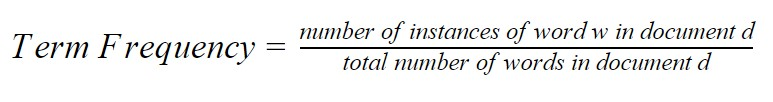

**Inverse Document Frequency (IDF)**
This parameter gives a numeric value of the importance of a word. Inverse Document frequency of word w is defined as the total number of documents (N) in a text corpus D, divided by the number of documents containing w.

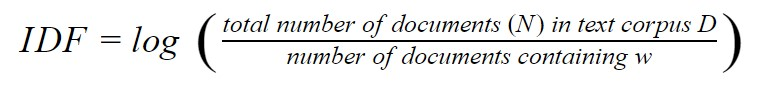

**Term Frequency Inverse Document Frequency (TF-IDF)**
The product of TF and IDF is the TF-IDF. TF-IDF is usually one of the best metrics to determine if a term is significant to a text. It represents the importance of a word in a particular document.

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
#tf idf
tf_idf = TfidfVectorizer()
#applying tf idf to data
data_tf = tf_idf.fit_transform(df['text_wo_url'])

In [88]:
print("n_samples: %d, n_features: %d" % data_tf.shape)

n_samples: 93, n_features: 612
